## 逻辑回归模型

The loss function above can be rewritten to be easier to implement. 损失函数
    $$loss(f_{\mathbf{w},b}(\mathbf{x}^{(i)}), y^{(i)}) = (-y^{(i)} \log\left(f_{\mathbf{w},b}\left( \mathbf{x}^{(i)} \right) \right) - \left( 1 - y^{(i)}\right) \log \left( 1 - f_{\mathbf{w},b}\left( \mathbf{x}^{(i)} \right) \right)$$
Recall that for logistic regression, the cost function is of the form 

$$ J(\mathbf{w},b) = \frac{1}{m} \sum_{i=0}^{m-1} \left[ loss(f_{\mathbf{w},b}(\mathbf{x}^{(i)}), y^{(i)}) \right] \tag{1}$$

Where each iteration performs simultaneous updates on $w_j$ for all $j$, where
$$\begin{align*}
\frac{\partial J(\mathbf{w},b)}{\partial w_j}  &= \frac{1}{m} \sum\limits_{i = 0}^{m-1} (f_{\mathbf{w},b}(\mathbf{x}^{(i)}) - y^{(i)})x_{j}^{(i)} \tag{2} \\
\frac{\partial J(\mathbf{w},b)}{\partial b}  &= \frac{1}{m} \sum\limits_{i = 0}^{m-1} (f_{\mathbf{w},b}(\mathbf{x}^{(i)}) - y^{(i)}) \tag{3} 
\end{align*}$$
需要的库如下：

In [102]:
import numpy as np 
import matplotlib.pyplot as plt
import csv

[[0.697 0.46 ]
 [0.774 0.376]
 [0.634 0.264]
 [0.608 0.318]
 [0.556 0.215]
 [0.403 0.237]
 [0.481 0.149]
 [0.437 0.211]
 [0.666 0.091]
 [0.243 0.267]
 [0.245 0.057]
 [0.343 0.099]
 [0.639 0.161]
 [0.657 0.198]
 [0.36  0.37 ]
 [0.593 0.042]
 [0.719 0.103]] [1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0]
fw_b()=[[2.157]
 [2.15 ]
 [1.898]
 [1.926]
 [1.771]
 [1.64 ]
 [1.63 ]
 [1.648]
 [1.757]
 [1.51 ]
 [1.302]
 [1.442]
 [1.8  ]
 [1.855]
 [1.73 ]
 [1.635]
 [1.822]]
(array([[-118.69581,  -77.9958 ],
       [-131.91902,  -63.57048],
       [-107.87682,  -44.33672],
       [-103.41184,  -53.61014],
       [ -94.48188,  -35.92195],
       [ -68.20719,  -39.70001],
       [ -81.60213,  -24.58777],
       [ -74.04601,  -35.23503],
       [-113.37218,  -14.62743],
       [ -40.73039,  -44.85191],
       [ -41.07385,   -8.78861],
       [ -57.90339,  -16.00127],
       [-108.73547,  -26.64853],
       [-111.82661,  -33.00254],
       [ -60.8228 ,  -62.5401 ],
       [-100.83589,   -6.21266],
       [-122.47387

[]

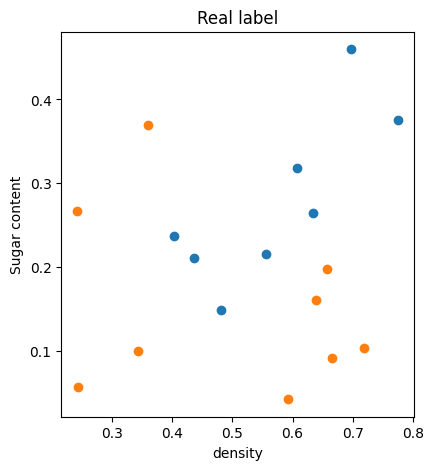

In [103]:
class LogisticModel:
    # 初始 X(m*n) y(m)
    def __init__(self,X,y,alpha=1) -> None:
        self.X=X
        self.y=y
        self.m=X.shape[0]
        self.n=X.shape[1]
        self.w=np.ones(np.shape(X))
        self.b=np.ones(X.shape[0])
        self.alpha=alpha
    # z
    def z(self):
        z=self.b
        for i in range(self.n):
            z+=np.multiply(self.w,self.X)[:,i]
        
        return z
    
    # g sigmoid函数
    def sigmoid(self,x):
        g=np.zeros((self.m,1))
        for i in range(self.m):
            g[i]=x[i]
        return g  

    def fw_b(self):
        fw_b=self.sigmoid(self.z())  #fw_b=g(z)
        return fw_b
    
    #损失函数J(w,b)=-y*log(fw_b)-(1-y)*log(1-fw_b)   y=0 J=-fw_b-1 y=1 J=-fw_b
    def cost(self):
        cost=0.0
        for i in range(len(self.y)):
            if y[i] == 1:
                cost += -(np.log(self.fw_b()))
            else:
                cost += -(np.log(1-self.fw_b()))
        return cost/len(self.y)
    
    
    # 梯度下降
    def gradient(self,num_iters):

        fw_b=self.fw_b()
        J_history=[]

        for i in range(num_iters):
            self.w=self.w-np.multiply(self.alpha,(np.sum(fw_b-self.y)*self.X)/self.m)
            self.b=self.b-np.multiply(self.alpha,np.sum(fw_b-self.y)/self.m)
            

        return self.w,self.b,J_history
    

f=open(r'data/watermelon_3a.csv',encoding='GB2312')
reader=csv.reader(f)
rows=[row for row in reader]        #rows[i]=[编号,密度,含糖率,好瓜]
X=[]                                #样本集
y=[]                                #标签值
for i in range(1,len(rows)):
    X.append([float(rows[i][1]),float(rows[i][2])])
    y.append(int(rows[i][4]))
X=np.array(X)                       #将list转变成numpy数组
y=np.array(y)    
print(X,y)
lm=LogisticModel(X,y)
#print(lm.z())
#print(lm.sigmoid(lm.z()))
print(f'fw_b()={lm.fw_b()}')
#print(lm.cost())
print(lm.gradient(5))
fig0=plt.figure(figsize=(10,5))
ax=plt.subplot(121)                 #真实分类
ax.scatter(X[:8,0],X[:8,1])         #正类
ax.scatter(X[8:,0],X[8:,1])         #负类
ax.set_xlabel('density')
ax.set_ylabel('Sugar content')
ax.set_title("Real label")
ax.plot()


In [104]:
x=np.array([[1,2],[1,2],[1,3]])
w=np.array([[2,2],[3,3],[4,4]])
y=np.array([[1,2,3],[]])
res=np.multiply(w,x)

print(x,w,res)
print(np.gradient(y))

ValueError: setting an array element with a sequence. The requested array has an inhomogeneous shape after 1 dimensions. The detected shape was (2,) + inhomogeneous part.

In [ ]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
f=open(r'data/watermelon_3a.csv',encoding='GB2312')
reader=csv.reader(f)
rows=[row for row in reader]        #rows[i]=[编号,密度,含糖率,好瓜]
X=[]                                #样本集
y=[]                                #标签值
for i in range(1,len(rows)):
    X.append([float(rows[i][1]),float(rows[i][2])])
    y.append(int(rows[i][4]))
X=np.array(X)                       #将list转变成numpy数组
y=np.array(y)    

# 划分数据集为训练集和测试集
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
 
# 创建逻辑回归模型
model = LogisticRegression()
 
# 训练模型
model.fit(X,y)
w=model.coef_
b=model.intercept_
print(w,b)
# 进行预测
y_pred = model.predict(X)
# print(y_pred)
# pred1=[]                            #预测正类的样本点集合
# pred0=[]                            #预测负类的样本点集合
# for i in range(len(y_pred)):
#     if(y_pred[i]==1):
#         pred1.append([X[i][0],X[i][1]])
#     else:
#         pred0.append([X[i][0],X[i][1]])
# pred1=np.array(pred1)
# pred0=np.array(pred0)

# #绘制分类结果2(真实分类&预测分类)
# fig0=plt.figure(figsize=(10,5))
# ax=plt.subplot(121)                 #真实分类
# ax.scatter(X[:8,0],X[:8,1])         #正类
# ax.scatter(X[8:,0],X[8:,1])         #负类
# ax.set_xlabel('density')
# ax.set_ylabel('Sugar content')
# ax.set_title("Real label")
# ax=plt.subplot(122)                 #预测分类
# ax.scatter(pred1[:,0],pred1[:,1])
# ax.scatter(pred0[:,0],pred0[:,1])

# ax.set_xlabel('density')
# ax.set_ylabel('Sugar content')
# ax.set_title("Prediction label")

# x1=np.linspace(0.2,0.8,1000)
# y1=(1-np.dot(w[0][0],x1)+b)
# ax.plot(x1,y1)
# plt.show()
# 评估模型性能
accuracy = accuracy_score(y, y_pred)
print(f"Accuracy: {accuracy}")

[[0.2890631  0.49458092]] [-0.37718839]
Accuracy: 0.6470588235294118


### 标准逻辑回归模型


In [ ]:
import numpy as np

class LogisticRegression:
    # 初始化学习率和迭代次数
    def __init__(self, learning_rate=0.01, iterations=1000):
        self.learning_rate = learning_rate
        self.iterations = iterations
    
    # sigmoid函数
    def sigmoid(self, z):
        return 1 / (1 + np.exp(-z))
    
    # fit函数 用于梯度下降求解w和b
    def fit(self, X, y):
        m, n = X.shape
        self.weights = np.zeros(n)
        self.bias = 0
        
        for _ in range(self.iterations):
            model = np.dot(X, self.weights) + self.bias
            prediction = self.sigmoid(model)
            
            dw = (1 / m) * np.dot(X.T, (prediction - y))
            db = (1 / m) * np.sum(prediction - y)
            
            self.weights -= self.learning_rate * dw
            self.bias -= self.learning_rate * db
    
    # 预测函数 用于对测试样本进行预测
    def predict(self, X):
        """进行预测"""
        model = np.dot(X, self.weights) + self.bias
        prediction = self.sigmoid(model)
        return [1 if i > 0.5 else 0 for i in prediction]
    
    def accuracy_score(self,y_true, y_pred):
        """计算准确率"""
        correct_predictions = sum(y_pred[i] == y_true[i] for i in range(len(y_true)))
        accuracy = correct_predictions / len(y_true)
        return accuracy

    def coef_(self):
        """返回w"""
        return self.weights
    
    def intercept_(self):
        """返回b"""
        return self.bias
    
    def train_test_split(self,X, y, test_size=0.2, random_state=None):
        """将数据集划分为训练集和测试集"""
        if random_state:
            np.random.seed(random_state)
        
        # 随机打乱索引
        indices = np.arange(X.shape[0])
        np.random.shuffle(indices)
        
        # 根据test_size计算测试集大小
        test_set_size = int(X.shape[0] * test_size)
        
        # 划分测试集和训练集
        test_indices = indices[:test_set_size]
        train_indices = indices[test_set_size:]
        
        # 划分数据集
        X_train = X[train_indices]
        X_test = X[test_indices]
        y_train = y[train_indices]
        y_test = y[test_indices]
        
        return X_train, X_test, y_train, y_test    
# 示例使用
# y_true = 真实标签(...)
# y_pred = 模型预测标签(...)
# print(f'模型准确率: {accuracy_score(y_true, y_pred):.2f}')


# 示例使用
# X, y = 加载你的数据集(...)
# model = LogisticRegression()
# model.fit(X, y)
# predictions = model.predict(X)


Accuracy: 0.7647058823529411


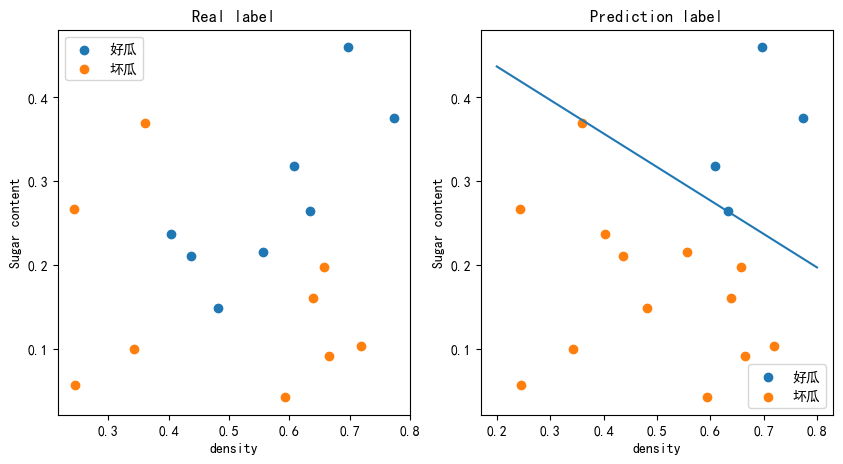

In [112]:
import numpy as np
import csv
from matplotlib import pyplot as plt
class LogisticRegression:
    def __init__(self, learning_rate=0.01, iterations=1000):
        self.learning_rate = learning_rate
        self.iterations = iterations
    
    def sigmoid(self, z):
        return 1 / (1 + np.exp(-z))
    
    def fit(self, X, y):
        m, n = X.shape
        self.weights = np.zeros(n)
        self.bias = 0
        
        for _ in range(self.iterations):
            model = np.dot(X, self.weights) + self.bias
            prediction = self.sigmoid(model)
            
            dw = (1 / m) * np.dot(X.T, (prediction - y))
            db = (1 / m) * np.sum(prediction - y)
            
            self.weights -= self.learning_rate * dw
            self.bias -= self.learning_rate * db
    
    def predict(self, X):
        model = np.dot(X, self.weights) + self.bias
        prediction = self.sigmoid(model)
        return [1 if i > 0.5 else 0 for i in prediction]
    
    def accuracy_score(self,y_true, y_pred):

        correct_predictions = sum(y_pred[i] == y_true[i] for i in range(len(y_true)))
        accuracy = correct_predictions / len(y_true)
        return accuracy
    def coef_(self):
        return self.weights
    
    def intercept_(self):
        return self.bias
    def train_test_split(self,X, y, test_size=0.2, random_state=None):
        """将数据集划分为训练集和测试集"""
        if random_state:
            np.random.seed(random_state)
        
        # 随机打乱索引
        indices = np.arange(X.shape[0])
        np.random.shuffle(indices)
        
        # 根据test_size计算测试集大小
        test_set_size = int(X.shape[0] * test_size)
        
        # 划分测试集和训练集
        test_indices = indices[:test_set_size]
        train_indices = indices[test_set_size:]
        
        # 划分数据集
        X_train = X[train_indices]
        X_test = X[test_indices]
        y_train = y[train_indices]
        y_test = y[test_indices]
        
        return X_train, X_test, y_train, y_test    


    
f=open(r'data/watermelon_3a.csv',encoding='GB2312')
reader=csv.reader(f)
rows=[row for row in reader]        #rows[i]=[编号,密度,含糖率,好瓜]
X=[]                                #样本集
y=[]                                #标签值
for i in range(1,len(rows)):
    X.append([float(rows[i][1]),float(rows[i][2])])
    y.append(int(rows[i][4]))
X=np.array(X)                       #将list转变成numpy数组
y=np.array(y)        
# X, y = 加载你的数据集(...)
model = LogisticRegression(0.030,1000)
model.fit(X, y)
predictions = model.predict(X)
y_pred=np.array(predictions)
accuracy = model.accuracy_score(y, y_pred)
print(f"Accuracy: {accuracy}")

# 计算
pred1=[]                            #预测正类的样本点集合
pred0=[]                            #预测负类的样本点集合
for i in range(len(y_pred)):
    if(y_pred[i]==1):
        pred1.append([X[i][0],X[i][1]])
    else:
        pred0.append([X[i][0],X[i][1]])
pred1=np.array(pred1)
pred0=np.array(pred0)

w=model.coef_()
b=model.intercept_()

#绘制分类结果2(真实分类&预测分类)
plt.rcParams['font.sans-serif'] = ['SimHei']
fig0=plt.figure(figsize=(10,5))
ax=plt.subplot(121)                 #真实分类
ax.scatter(X[:8,0],X[:8,1])         #正类
ax.scatter(X[8:,0],X[8:,1])         #负类
ax.set_xlabel('密度')
ax.set_ylabel('含糖率')
ax.set_title("真实分类")
ax.legend(['好瓜','坏瓜'])

ax=plt.subplot(122)                 #预测分类
ax.scatter(pred1[:,0],pred1[:,1])   #正类
ax.scatter(pred0[:,0],pred0[:,1])   #父类
ax.set_xlabel('密度')
ax.set_ylabel('含糖率')
ax.set_title("预测分类")
ax.legend(['好瓜','坏瓜'])

x1=np.linspace(0.2,0.8,1000)
y1=-(np.dot(w[0],x1)+b)/w[1]
ax.plot(x1,y1)
plt.show()

Accuracy: 1.0
[-0.50268282 -1.744883    2.78209663  1.2491586 ] -0.3073457986157641


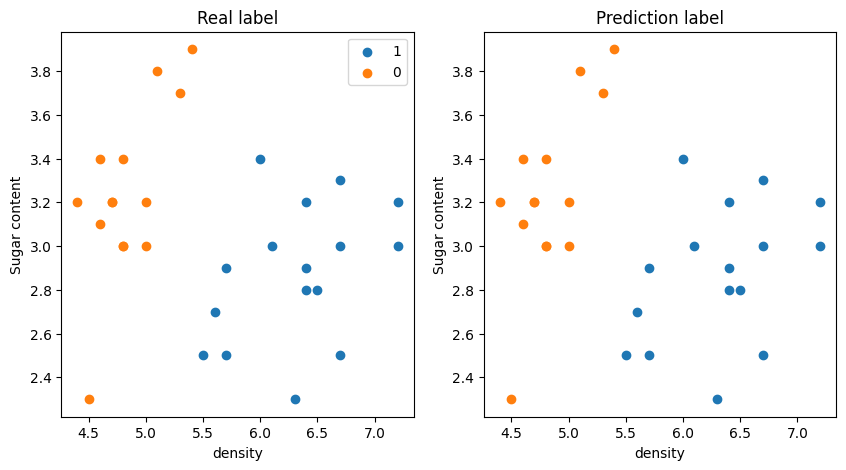

In [109]:
f=open(r'data/Iris.csv',encoding='GB2312')
reader=csv.reader(f)
rows=[row for row in reader]        #rows[i]=[编号,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species]
X=[]                                #样本集
y=[]                                #标签值
for i in range(1,len(rows)):
    X.append([float(rows[i][1]),float(rows[i][2]),float(rows[i][3]),float(rows[i][4])])
    if rows[i][5]=='Iris-setosa':
        y.append(0)
    else:
        y.append(1)
X=np.array(X)                       #将list转变成numpy数组
y=np.array(y)
# print(X,np.sum(y))        
# 将数据划分为X_train, X_test, y_train, y_test 
X_train, X_test, y_train, y_test = model.train_test_split(X, y, test_size=0.2, random_state=2)

# X, y = 加载你的数据集(...)
model = LogisticRegression(1,50)
model.fit(X_train, y_train)
predictions = model.predict(X_test)
y_pred=np.array(predictions)
accuracy = model.accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")

# 计算
test1=[]
test0=[]
pred1=[]                            #预测正类的样本点集合
pred0=[]                            #预测负类的样本点集合
    
for i in range(len(y_pred)):
    if(y_test[i]==1):
        test1.append([X_test[i][0],X_test[i][1]])
    else:
        test0.append([X_test[i][0],X_test[i][1]])

    if(y_pred[i]==1):
        pred1.append([X_test[i][0],X_test[i][1]])
    else:
        pred0.append([X_test[i][0],X_test[i][1]])


pred1=np.array(pred1)
pred0=np.array(pred0)
test1=np.array(test1)
test0=np.array(test0)

w=model.coef_()
b=model.intercept_()
print(w,b)
#绘制分类结果2(真实分类&预测分类)
fig0=plt.figure(figsize=(10,5))
ax=plt.subplot(121)                 #真实分类
ax.scatter(test1[:,0],test1[:,1])         #正类
ax.scatter(test0[:,0],test0[:,1])         #负类
ax.set_xlabel('density')
ax.set_ylabel('Sugar content')
ax.set_title("Real label")


ax=plt.subplot(122)                 #预测分类
ax.scatter(pred1[:,0],pred1[:,1])   #正类
ax.scatter(pred0[:,0],pred0[:,1])   #父类

ax.set_xlabel('density')
ax.set_ylabel('Sugar content')
ax.set_title("Prediction label")

# x1=np.linspace(4.5,7.0,1000)
# y1=-(np.dot(w[0],x1)+b)/w[1]
# ax.plot(x1,y1)
plt.show()